## Predicting Home Prices in Ames, Iowa

This notebook shows the process of cleaning, EDA, and creating a linear regression model based on the Ames Housing Dataset. The purpose of the project is to predict the price of a house at sale. 

[Click here for Data Dictionary.](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

Brief data summary:
- 2930 observations, and 82 variables
- from the Ames Assessor's Office 
- used in computing assessed values for individual residential properties sold in Ames, Iowa from 2006 to 2010.

All General Assembly students submitted a csv of test data predictions to an internal Kaggle Competition. This was our second project, and first project involving modeling. _My model ranked 12 out of 94 total entries._ 

Guidelines:
For the purposes of the project we were bound to use a linear regression model.

### Bringing in the data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, LinearRegression

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df_train = pd.read_csv('./datasets/train.csv')

In [81]:
df_test = pd.read_csv('./datasets/test.csv')

### Cleaning and EDA

In [5]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
df_train.isnull().sum().sort_values(ascending = False)[:30]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

In [82]:
df_test.isnull().sum().sort_values(ascending = False)[:30]

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
Bsmt Exposure      25
BsmtFin Type 1     25
Bsmt Qual          25
BsmtFin Type 2     25
Bsmt Cond          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
Overall Cond        0
Exter Qual          0
Exter Cond          0
Foundation          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
Year Remod/Add      0
Year Built          0
Sale Type           0
dtype: int64

A lot of thinking went into how to approach these null values at the time of this project. Using the data dictionary, it was possible to determine the columns in which NaN indicated the home did not have the item (such as _Fireplace Quality_). I chose to impute the cells within these rows with a 0 for the project.

In [7]:
list_of_columns = ['Pool QC', 'Misc Feature', 'Alley',
                   'Fence', 'Garage Cond', 'Garage Qual', 
                   'Garage Yr Blt', 'Garage Finish', 'Garage Type',
                   'Bsmt Exposure', 'BsmtFin Type 1', 'Bsmt Qual',
                   'BsmtFin Type 2', 'Bsmt Cond', 'Fireplace Qu',
                   'Lot Frontage']

In [8]:
def fill_nulls_zero(df, list_of_columns):
    
    for column in list_of_columns:
        df[column] = df[column].fillna(0)
        
        print(f'{column} filled.')
        
    
    print('Done.')
    
    
    return df
        

In [9]:
df_train = fill_nulls_zero(df_train, list_of_columns)

Pool QC filled.
Misc Feature filled.
Alley filled.
Fence filled.
Garage Cond filled.
Garage Qual filled.
Garage Yr Blt filled.
Garage Finish filled.
Garage Type filled.
Bsmt Exposure filled.
BsmtFin Type 1 filled.
Bsmt Qual filled.
BsmtFin Type 2 filled.
Bsmt Cond filled.
Fireplace Qu filled.
Lot Frontage filled.
Done.


In [83]:
df_test = fill_nulls_zero(df_test, list_of_columns)

Pool QC filled.
Misc Feature filled.
Alley filled.
Fence filled.
Garage Cond filled.
Garage Qual filled.
Garage Yr Blt filled.
Garage Finish filled.
Garage Type filled.
Bsmt Exposure filled.
BsmtFin Type 1 filled.
Bsmt Qual filled.
BsmtFin Type 2 filled.
Bsmt Cond filled.
Fireplace Qu filled.
Lot Frontage filled.
Done.


In [10]:
df_train.isnull().sum().sort_values(ascending=False)[:15]

Mas Vnr Area      22
Mas Vnr Type      22
Bsmt Full Bath     2
Bsmt Half Bath     2
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
BsmtFin SF 1       1
Garage Cars        1
Garage Area        1
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
dtype: int64

In [84]:
df_test.isnull().sum().sort_values(ascending=False)[:15]

Electrical        1
Mas Vnr Type      1
Mas Vnr Area      1
Sale Type         0
Exter Qual        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Exter Cond        0
Bsmt Unf SF       0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
dtype: int64

In [11]:
df_train.shape

(2051, 81)

In [85]:
df_test.shape

(879, 80)

With the overall row count being 2051, I felt it was okay to drop columns that still had NaNs. These were less obvious for me to explain, and they did not take up enough of the data for it to cause issues with modeling.

In [12]:
df_train = df_train.dropna()

In [86]:
df_test = df_test.dropna()

In [13]:
df_train.isnull().sum().value_counts()

0    81
dtype: int64

In [87]:
df_test.isnull().sum().value_counts()

0    80
dtype: int64



### Feature Engineering

Goals:
- numerize selected ordinal columns
- binarize selected nominal columns 
- create buckets of categorical columns when appropriate
- creating interaction columns as appropriate

In [14]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,0,0,0,3,2010,WD,138500


Finding some of the common ordinal variables to `.map()` and numerize.

In [15]:
for column in df_train:
    uniques = df_train[column].unique()
    
    if ['TA'] in uniques:
        print(f'{column} uniques: {uniques}')

Exter Qual uniques: ['Gd' 'TA' 'Fa' 'Ex']
Exter Cond uniques: ['TA' 'Gd' 'Fa' 'Ex' 'Po']
Bsmt Qual uniques: ['TA' 'Gd' 'Fa' 0 'Ex' 'Po']
Bsmt Cond uniques: ['TA' 'Gd' 0 'Fa' 'Po' 'Ex']
Heating QC uniques: ['Ex' 'TA' 'Gd' 'Fa' 'Po']
Kitchen Qual uniques: ['Gd' 'TA' 'Fa' 'Ex']
Fireplace Qu uniques: [0 'TA' 'Gd' 'Po' 'Ex' 'Fa']
Garage Qual uniques: ['TA' 'Fa' 0 'Gd' 'Ex' 'Po']
Garage Cond uniques: ['TA' 'Fa' 0 'Po' 'Gd' 'Ex']
Pool QC uniques: [0 'Fa' 'Gd' 'Ex' 'TA']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [16]:
list_to_numerize = ['Exter Qual', 'Exter Cond', 'Bsmt Qual',
                    'Bsmt Cond', 'Heating QC', 'Kitchen Qual',
                    'Fireplace Qu', 'Garage Qual', 'Garage Cond',
                    'Pool QC']

In [17]:
df_train.isnull().sum().sum()

0

`Function to map over the ordinal variables`

In [18]:
mapped_dict = {'Ex':5, 'Gd':4, 
               'TA':3, 'Fa': 2, 
               'Po': 1, 0: 0}

def series_mapper(df, series_list, mapped_dict):
    
    for column in series_list:
        df[column] = df[column].map(mapped_dict)
        
        print(f'{column} mapped.')
    
    print('Done.')
    
    return df

In [19]:
df_train = series_mapper(df_train, list_to_numerize, mapped_dict)

Exter Qual mapped.
Exter Cond mapped.
Bsmt Qual mapped.
Bsmt Cond mapped.
Heating QC mapped.
Kitchen Qual mapped.
Fireplace Qu mapped.
Garage Qual mapped.
Garage Cond mapped.
Pool QC mapped.
Done.


In [88]:
df_test = series_mapper(df_test, list_to_numerize, mapped_dict)

Exter Qual mapped.
Exter Cond mapped.
Bsmt Qual mapped.
Bsmt Cond mapped.
Heating QC mapped.
Kitchen Qual mapped.
Fireplace Qu mapped.
Garage Qual mapped.
Garage Cond mapped.
Pool QC mapped.
Done.


In [20]:
df_train[list_to_numerize].head()

,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC
0,4,3,3,3,5,4,0,3,3,0
1,4,3,4,3,5,4,3,3,3,0
2,3,4,3,3,3,4,0,3,3,0
3,3,3,4,3,4,3,0,3,3,0
4,3,3,2,4,3,3,0,3,3,0


In [89]:
df_test[list_to_numerize].head()

,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC
0,3,2,2,3,4,2,0,1,1,0
1,3,3,4,3,3,3,0,3,3,0
2,4,3,4,4,5,4,4,3,3,0
3,4,3,3,3,3,3,0,2,3,0
4,3,3,4,3,4,3,4,3,3,0


In [21]:
df_train['Exter Qual'].unique() #making sure it stuck

array([4, 3, 2, 5])

In [22]:
df_train.isnull().sum().sum() #confirming

0

In [90]:
df_test.isnull().sum().sum() #confirming

0

Creating dummy variables for appropriate nominal features. 

In [23]:
dummy_list = ['Bldg Type', 'Lot Config', 'Street']
df_train = pd.get_dummies(df_train, columns = dummy_list, drop_first=True)

df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Neighborhood,Condition 1,Condition 2,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Street_Pave
0,109,533352170,60,RL,0.0,13517,0,IR1,Lvl,AllPub,Gtl,Sawyer,RRAe,Norm,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,3,3,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500,0,0,0,0,1,0,0,0,1
1,544,531379050,60,RL,43.0,11492,0,IR1,Lvl,AllPub,Gtl,SawyerW,Norm,Norm,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,5,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,3,Attchd,1997.0,RFn,2.0,559.0,3,3,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000,0,0,0,0,1,0,0,0,1
2,153,535304180,20,RL,68.0,7922,0,Reg,Lvl,AllPub,Gtl,NAmes,Norm,Norm,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,3,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,3,3,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000,0,0,0,0,0,0,0,1,1
3,318,916386060,60,RL,73.0,9802,0,Reg,Lvl,AllPub,Gtl,Timber,Norm,Norm,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,4,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,3,3,Y,100,0,0,0,0,0,0,0,0,0,4,2010,WD,174000,0,0,0,0,0,0,0,1,1
4,255,906425045,50,RL,82.0,14235,0,IR1,Lvl,AllPub,Gtl,SawyerW,Norm,Norm,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,3,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,3,3,N,0,59,0,0,0,0,0,0,0,0,3,2010,WD,138500,0,0,0,0,0,0,0,1,1


In [91]:
df_test = pd.get_dummies(df_test, columns = dummy_list, drop_first=True)

df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Neighborhood,Condition 1,Condition 2,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Street_Pave
0,2658,902301120,190,RM,69.0,9142,Grvl,Reg,Lvl,AllPub,Gtl,OldTown,Norm,Norm,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,No,Unf,0,Unf,0,1020,1020,GasA,4,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,2,9,Typ,0,0,Detchd,1910.0,Unf,1,440,1,1,Y,0,60,112,0,0,0,0,0,0,0,4,2006,WD,1,0,0,0,0,0,0,1,1
1,2718,905108090,90,RL,0.0,9662,0,IR1,Lvl,AllPub,Gtl,Sawyer,Norm,Norm,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,No,Unf,0,Unf,0,1967,1967,GasA,3,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,3,10,Typ,0,0,Attchd,1977.0,Fin,2,580,3,3,Y,170,0,0,0,0,0,0,0,0,0,8,2006,WD,0,1,0,0,0,0,0,1,1
2,2414,528218130,60,RL,58.0,17104,0,IR1,Lvl,AllPub,Gtl,Gilbert,Norm,Norm,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,Av,GLQ,554,Unf,0,100,654,GasA,5,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,4,7,Typ,1,4,Attchd,2006.0,RFn,2,426,3,3,Y,100,24,0,0,0,0,0,0,0,0,9,2006,New,0,0,0,0,0,0,0,1,1
3,1989,902207150,30,RM,60.0,8520,0,Reg,Lvl,AllPub,Gtl,OldTown,Norm,Norm,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,No,Unf,0,Unf,0,968,968,GasA,3,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,3,5,Typ,0,0,Detchd,1935.0,Unf,2,480,2,3,N,0,0,184,0,0,0,0,0,0,0,7,2007,WD,0,0,0,0,0,0,0,1,1
4,625,535105100,20,RL,0.0,9500,0,IR1,Lvl,AllPub,Gtl,NAmes,Norm,Norm,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,No,BLQ,609,Unf,0,785,1394,GasA,4,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,3,6,Typ,2,4,Attchd,1963.0,RFn,2,514,3,3,Y,0,76,0,0,185,0,0,0,0,0,7,2009,WD,0,0,0,0,0,0,0,1,1


In [24]:
df_train.shape

(2026, 87)

In [92]:
df_test.shape

(877, 86)

Creating buckets for appropriate variables.

In [26]:
print(df_train['Total Bsmt SF'].min())
print(df_train['Total Bsmt SF'].max())
print(6110/5)

0.0
6110.0
1222.0


In [27]:
basement_list = []

for num in df_train['Total Bsmt SF']:
    if num > 4888:
        basement_list.append(5)
    elif num > 3666:
        basement_list.append(4)
    elif num > 2444:
        basement_list.append(3)
    elif num > 1223:
        basement_list.append(2)
    elif num > 0:
        basement_list.append(1)
    else:
        basement_list.append(0)


In [100]:
df_train.shape

(2026, 91)

In [101]:
df_train['Total Bsmt SF'].shape

(2026,)

In [102]:
len(basement_list)

2026

In [103]:
df_train['Basement Buckets'] = basement_list

In [94]:
test_basement_list = []

for num in df_test['Total Bsmt SF']:
    if num > 4888:
        test_basement_list.append(5)
    elif num > 3666:
        test_basement_list.append(4)
    elif num > 2444:
        test_basement_list.append(3)
    elif num > 1223:
        test_basement_list.append(2)
    elif num > 0:
        test_basement_list.append(1)
    else:
        test_basement_list.append(0)


In [95]:
df_test.shape

(877, 86)

In [96]:
len(test_basement_list)

877

In [99]:
df_test['Basement Buckets'] = test_basement_list

Creating Interaction Variables

In [32]:
df_train['Total Home SF'] = df_train['Gr Liv Area'] * df_train['Total Bsmt SF']
df_train['All Baths'] = df_train['Full Bath'] * df_train['Half Bath']

In [104]:
df_test['Total Home SF'] = df_test['Gr Liv Area'] * df_test['Total Bsmt SF']
df_test['All Baths'] = df_test['Full Bath'] * df_test['Half Bath']

Visually checking my `y variable distribution` to see if it's normal or if it makes more sense to take the natural log of y.

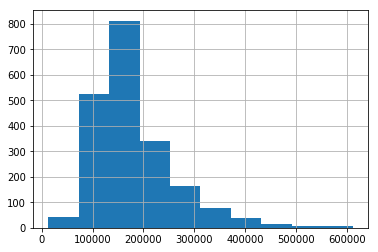

In [33]:
df_train['SalePrice'].hist()

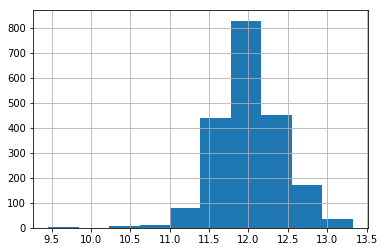

In [34]:
df_train['Log SalePrice'] = np.log(df_train['SalePrice'])

df_train['Log SalePrice'].hist() #this is more normally distributed, so going with it

### Checking correlation and determining best feature selection

In [35]:
corrs = df_train.drop(columns= 'SalePrice').corrwith(df_train['Log SalePrice']).sort_values(ascending = False).to_frame()
corrs.rename(columns = {0:'Correlation'}, inplace = True)

corrs.head(5)

,Correlation
Log SalePrice,1.000000
Overall Qual,0.822496
Exter Qual,0.688952
Gr Liv Area,0.688935
Kitchen Qual,0.679906


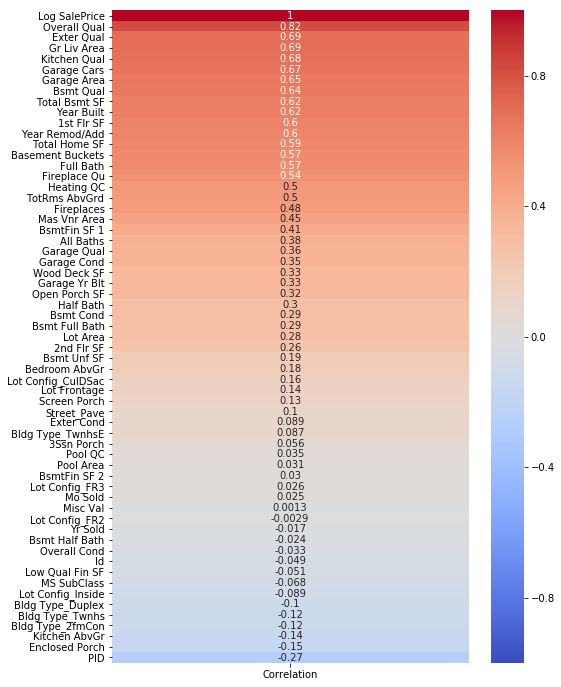

In [36]:
plt.figure(figsize=(8,12))
sns.heatmap(corrs,
            annot=True,
            vmin = -1,
            vmax = 1, 
            cmap = 'coolwarm');

Decided to include all features that have a `correlation absolute value > .3.`

In [37]:
df_train.isnull().sum().sum()

0

In [38]:
features = corrs[corrs['Correlation'] > .3].reset_index() #dataframe
features = features['index'].drop(index = 0) #series
features

1         Overall Qual
2           Exter Qual
3          Gr Liv Area
4         Kitchen Qual
5          Garage Cars
6          Garage Area
7            Bsmt Qual
8        Total Bsmt SF
9           Year Built
10          1st Flr SF
11      Year Remod/Add
12       Total Home SF
13    Basement Buckets
14           Full Bath
15        Fireplace Qu
16          Heating QC
17       TotRms AbvGrd
18          Fireplaces
19        Mas Vnr Area
20        BsmtFin SF 1
21           All Baths
22         Garage Qual
23         Garage Cond
24        Wood Deck SF
25       Garage Yr Blt
26       Open Porch SF
Name: index, dtype: object

### Feature Visualizations

Some feature comparison of the `'SalePrice'` and `'Log SalePrice'` to confirm using the 'Log SalePrice' is more logical for this dataset.

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


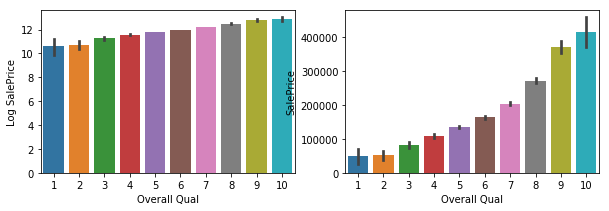

In [39]:
fig, ax = plt.subplots(1,2, figsize=(10,3))

sns.barplot('Overall Qual', 'Log SalePrice', data=df_train, ax=ax[0]);
sns.barplot('Overall Qual', 'SalePrice', data=df_train, ax=ax[1]);
fig.show()

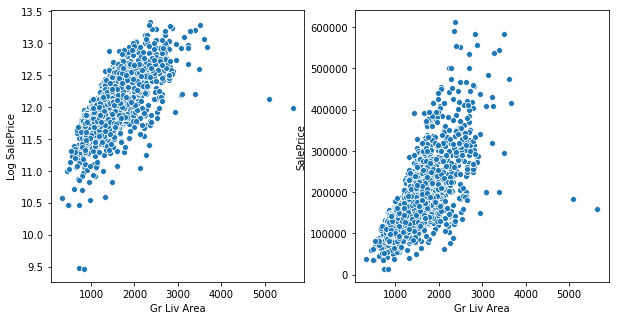

In [40]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot('Gr Liv Area', 'Log SalePrice', data=df_train, ax=ax[0])
sns.scatterplot('Gr Liv Area', 'SalePrice', data=df_train, ax=ax[1])

<Figure size 1800x360 with 0 Axes>

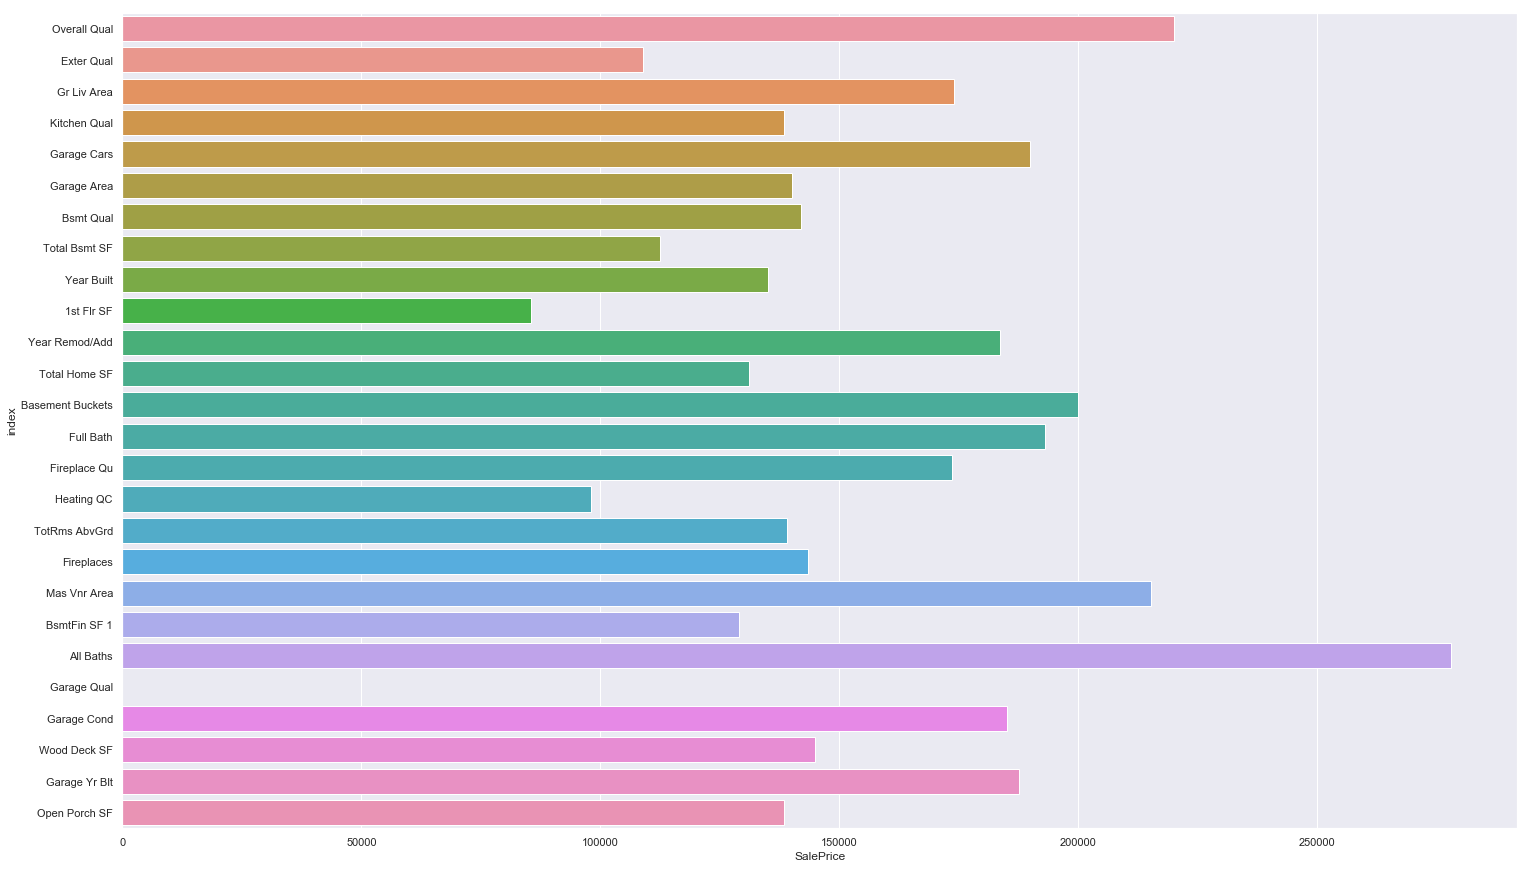

In [41]:
plt.figure(num=2, figsize=(25,5), frameon=False)
sns.set(font_scale = 1)
fig , ax = plt.subplots(figsize = (25,15))
sns.barplot(y=features, 
            x=df_train['SalePrice'],  
            ax=ax);

<Figure size 1800x360 with 0 Axes>

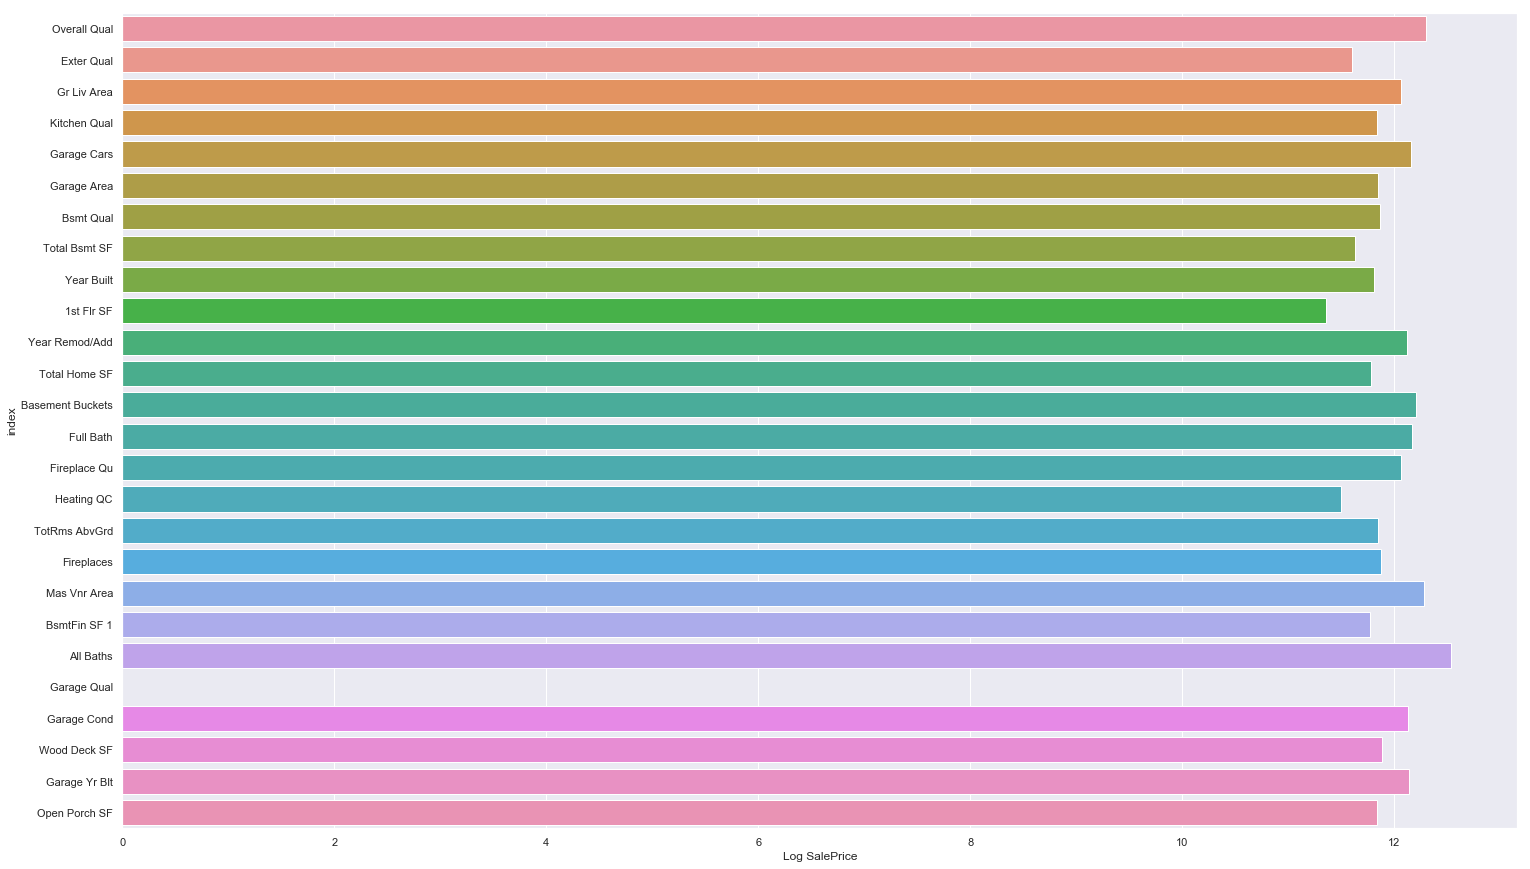

In [42]:
plt.figure(num=2, figsize=(25,5), frameon=False)
sns.set(font_scale = 1)
fig , ax = plt.subplots(figsize = (25,15))
sns.barplot(y=features, 
            x=df_train['Log SalePrice'],  
            ax=ax);

In [43]:
print(df_train['Log SalePrice'].min())
print(df_train['Log SalePrice'].max())
print(df_train['SalePrice'].min())
print(df_train['SalePrice'].max())
print(df_train['Log SalePrice'].max() - df_train['Log SalePrice'].min())
print(df_train['SalePrice'].max() - df_train['SalePrice'].min())

9.45634070543332
13.323926946863102
12789
611657
3.867586241429782
598868


Based on each of the visualizations, including the original histogram, taking the Log of SalePrice is a much more normalized y_variable. There is significantly less variation between features. The range of Log SalePrice values is less than 4, while the range of SalePrice values is over 598,000.

### Modeling, Scoring, and Comparing Coefficients and Loss Functions

In [45]:
lr = LinearRegression()
lasso = LassoCV(cv=5)
ridge = RidgeCV(cv=5)

ss = StandardScaler()

In [44]:
X = df_train[features]
y = df_train['Log SalePrice']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

In [47]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Fitting the data to all three regression models for comparison.

In [49]:
lr.fit(X_train_sc, y_train)
lasso.fit(X_train_sc, y_train)
ridge.fit(X_train_sc, y_train);

Creating quick functions to display all three crossval scores and the scores of each model.

In [56]:
def all_crossvals(X_train_sc, y_train):
    lr = LinearRegression()
    lasso = LassoCV(cv=5)
    ridge = RidgeCV(cv=5)
    
    print(f'lr cv score: {cross_val_score(lr, X_train_sc, y_train, cv=5).mean()}')
    print(f'lasso cv score: {cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()}')
    print(f'ridge cv score: {cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()}')

In [57]:
all_crossvals(X_train_sc, y_train)

lr cv score: 0.8712620332571286
lasso cv score: 0.8710815471691907
ridge cv score: 0.8712880005091973


In [58]:
def all_fit_score(X_train_sc, X_test_sc, y_train, y_test):
    lr = LinearRegression()
    lasso = LassoCV(cv=5)
    ridge = RidgeCV(cv=5)
    
    lr.fit(X_train_sc, y_train)
    lasso.fit(X_train_sc, y_train)
    ridge.fit(X_train_sc, y_train)
    
    print(f'lr train score: {lr.score(X_train_sc, y_train)}')
    print(f'lr test score: {lr.score(X_test_sc, y_test)}')
    print(f'lr cv score: {cross_val_score(lr, X_train_sc, y_train, cv=5).mean()}')
    
    print(' ')
    
    print(f'lasso train score: {lasso.score(X_train_sc, y_train)}')
    print(f'lasso test score: {lasso.score(X_test_sc, y_test)}')
    print(f'lasso cv score: {cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()}')
    
    print(' ')
    
    print(f'ridge train score: {ridge.score(X_train_sc, y_train)}')
    print(f'ridge test score: {ridge.score(X_test_sc, y_test)}')
    print(f'ridge cv score: {cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()}')

In [59]:
all_fit_score(X_train_sc, X_test_sc, y_train, y_test)

lr train score: 0.8783174284759553
lr test score: 0.8878631310546444
lr cv score: 0.8712620332571286
 
lasso train score: 0.8782384228120689
lasso test score: 0.888545777324117
lasso cv score: 0.8710815471691907
 
ridge train score: 0.8783173729246005
ridge test score: 0.8878817561512851
ridge cv score: 0.8712880005091973


Looking at the coefficients

In [69]:
ridge_min = np.exp(ridge.coef_).min()
ridge_max = np.exp(ridge.coef_).max()

print(f'ridge min: {ridge_min}')
print(f'ridge max: {ridge_max}')
print(f'ridge coef range: {ridge_max-ridge_min}')

ridge min: 0.8002773993820662
ridge max: 1.215976540284227
ridge coef range: 0.41569914090216087


In [70]:
ridge_coefs_df = pd.DataFrame(np.exp(ridge.coef_), 
                 index = X.columns).sort_values(0, 
                                                ascending=False)

ridge_coefs_df = ridge_coefs_df.rename(columns = {0: 'Ridge Coeffs'})

ridge_coefs_df[:5]

,Ridge Coeffs
Gr Liv Area,1.215977
Total Bsmt SF,1.185182
Overall Qual,1.106951
Garage Cond,1.096732
BsmtFin SF 1,1.054009


In [72]:
lasso_min = np.exp(lasso.coef_).min()
lasso_max = np.exp(lasso.coef_).max()

print(f'lasso min: {lasso_min}')
print(f'lasso max: {lasso_max}')
print(f'lasso range: {lasso_max-lasso_min}')

lasso min: 0.8043197983235028
lasso max: 1.2129479593312116
lasso range: 0.4086281610077088


The predictions I made for the Kaggle competition were from a ridge model. I did not compare the ranges of the coefficients previously. Since there is a slight difference, I am going to move forward with lasso. 

### Model Visualizations

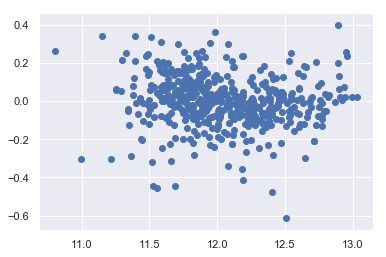

In [74]:
pred_lasso = lasso.predict(X_test_sc)
residuals = y_test - pred_lasso
plt.scatter(pred_lasso, residuals);

In [75]:
print(f'lasso pred max: {pred_lasso.max()}')
print(f'lasso pred min: {pred_lasso.min()}')

lasso pred max: 13.030411278479438
lasso pred min: 10.804439000343184


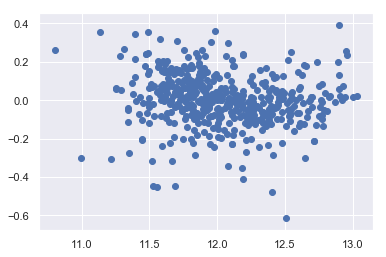

In [76]:
pred_ridge = ridge.predict(X_test_sc)
residuals = y_test - pred_ridge
plt.scatter(pred_ridge, residuals);

In [77]:
print(f'ridge pred max: {pred_ridge.max()}')
print(f'ridge pred min: {pred_ridge.min()}')

ridge pred max: 13.031064603203738
ridge pred min: 10.804117990588257


Lasso `residuals` and `actual values` compared to the predictions.

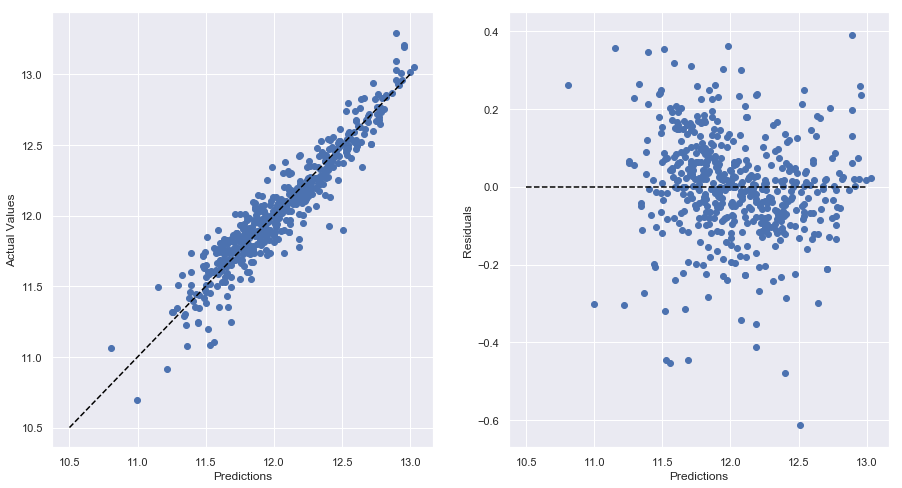

In [78]:
fig , (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,8))

ax1.scatter(pred_lasso, y_test)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Actual Values')

ax1.plot([10.5,13], [10.5,13], 
         linestyle = '--', color = 'black')

ax2.scatter(pred_lasso, residuals)
ax2.set_xlabel('Predictions')
ax2.set_ylabel('Residuals')

ax2.plot([10.5,13], [0,0],
        linestyle = '--', color = 'black');

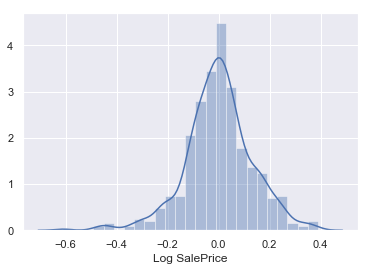

In [80]:
fig, ax1 = plt.subplots()
sns.distplot(residuals, bins = 25);

### Test dataset final steps

In [106]:
df_testfeatures = df_test[features]

In [108]:
df_test_sc = ss.transform(df_testfeatures)

preds = lasso.predict(df_test_sc)

preds.shape

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


(877,)

In [109]:
lasso_preds = np.exp(preds)

In [114]:
df_test['SalePrice'] = lasso_preds

df_test[['Id', 'SalePrice']][:15]

,Id,SalePrice
0,2658,104056.957975
1,2718,173585.688054
2,2414,199579.219854
3,1989,117159.860080
4,625,175460.942283
5,333,98067.316439
6,1327,110829.183515
7,858,140045.791583
8,95,190206.619389
9,1568,172147.520364


In [115]:
submission = df_test[['Id', 'SalePrice']]

submission.shape

(877, 2)

In [116]:
submission.to_csv('lasso_pred_saleprice.csv')